Reference:

- Data source:
    <https://data.worldbank.org/topic/climate-change?end=2018&start=1973>
- Custom scatterplot colors with colorbar in Matplotlib:
    <https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html>
- Legend guide
    <https://matplotlib.org/users/legend_guide.html>
- Greenhouse gas
    <https://en.wikipedia.org/wiki/Greenhouse_gas>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
# from jupyterthemes import jtplot

In [2]:
climate_1960_2018 = pd.read_csv('datasets/climate_1960_2018.csv')
climate_1960_2018.drop(columns='Unnamed: 63', inplace=True)

In [3]:
climate_1960_2018.shape

(20064, 63)

In [4]:
indicators = ['Population, total',
              'Population growth (annual %)',
              # greenhouse gas
              'CO2 emissions (kt)',
              'CO2 emissions (metric tons per capita)',
              'Methane emissions (kt of CO2 equivalent)',
              'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
              'SF6 gas emissions (thousand metric tons of CO2 equivalent)',
              'PFC gas emissions (thousand metric tons of CO2 equivalent)',
              'HFC gas emissions (thousand metric tons of CO2 equivalent)',
              'Total greenhouse gas emissions (kt of CO2 equivalent)',
              
              'Electric power consumption (kWh per capita)',
              'Energy use (kg of oil equivalent per capita)',
              'Forest area (% of land area)',
              'Forest area (sq. km)',
              'Agricultural land (% of land area)']

climate_filtered_1960_2018 = climate_1960_2018[climate_1960_2018['Indicator Name'].isin(indicators)]
climate_filtered_1960_2018.fillna(0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
climate_filtered_1960_2018.drop(columns=['Country Code', 'Indicator Code'], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
def df_4each_indicator(glb_df, indicator):
    df = glb_df[glb_df['Indicator Name'] == indicator]
    df.index = df['Country Name']
    df.drop(columns=['Country Name', 'Indicator Name'], inplace=True)
    df = df.T
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    return df

In [7]:
pop_tot_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                       'Population, total')
pop_growthPct_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                             'Population growth (annual %)')

co2_kt_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                      'CO2 emissions (kt)')
co2_tons_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'CO2 emissions (metric tons per capita)')
methane_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                       'Methane emissions (kt of CO2 equivalent)')
n2o_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)')
sf6_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'SF6 gas emissions (thousand metric tons of CO2 equivalent)')
pfc_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'PFC gas emissions (thousand metric tons of CO2 equivalent)')
hfc_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                        'HFC gas emissions (thousand metric tons of CO2 equivalent)')
greenhouse_gas_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                              'Total greenhouse gas emissions (kt of CO2 equivalent)')

elec_power_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                          'Electric power consumption (kWh per capita)')
energy_use_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                          'Energy use (kg of oil equivalent per capita)')
forest_areaPct_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                              'Forest area (% of land area)')
forest_areaSQ_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                             'Forest area (sq. km)')
agric_landPct_1960_2018 = df_4each_indicator(climate_filtered_1960_2018,
                                             'Agricultural land (% of land area)')

In [8]:
def billions_0dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-9)

def billions_1dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.1f' % (x * 1e-9)

def billions_3dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.3f' % (x * 1e-9)

def millions_0dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-6)

def millions_1dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.1f' % (x * 1e-6)

def milles_dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-3)

FORMATTER_BILLIONS_0DEC = FuncFormatter(billions_0dec)
FORMATTER_BILLIONS_1DEC = FuncFormatter(billions_1dec)
FORMATTER_BILLIONS_3DEC = FuncFormatter(billions_3dec)

FORMATTER_MILLIONS_0DEC = FuncFormatter(millions_0dec)
FORMATTER_MILLIONS_1DEC = FuncFormatter(millions_1dec)

FORMATTER_MILLES = FuncFormatter(milles_dec)

# YRS = mdates.YearLocator()
# YRFMT = mdates.DateFormatter('%Y')

## About population

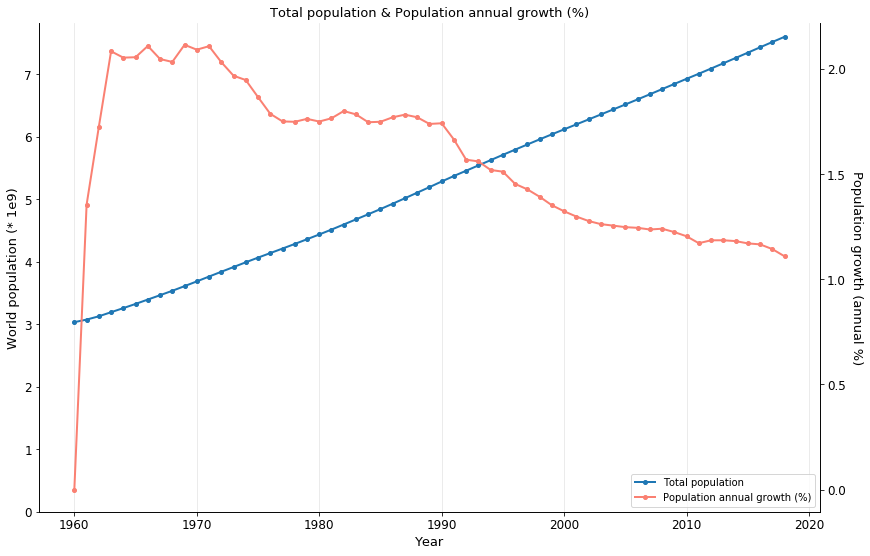

In [9]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
axarr.set_title('Total population & Population annual growth (%)', fontdict={'fontsize': 13})

line_tot, = axarr.plot(pop_tot_1960_2018.index,
                       pop_tot_1960_2018['World'],
                       label='Total population',
                       linewidth=2,
                       marker='.',
                       markersize=8)

axarr_02 = axarr.twinx()
line_pct, = axarr_02.plot(pop_growthPct_1960_2018.index,
                          pop_growthPct_1960_2018['World'],
                          color='salmon',
                          label='Population annual growth (%)',
                          linewidth=2,
                          marker='.',
                          markersize=8)

axarr.tick_params(axis='both', labelsize=12)
axarr.set_xlabel('Year', size=13)
axarr.set_ylabel('World population (* 1e9)', size=13)
axarr.set_ylim(bottom=0)
axarr.yaxis.set_major_formatter(FORMATTER_BILLIONS_0DEC)
axarr.spines['top'].set_visible(False)
axarr.grid(alpha=0.3, axis='x')

axarr_02.tick_params(axis='both', labelsize=12)
axarr_02.set_ylabel('Population growth (annual %)', rotation=270, labelpad=17, size=13)
axarr_02.spines['top'].set_visible(False)
axarr_02.legend(handles=[line_tot, line_pct], loc=4)

plt.show()
# plt.savefig('population-and-growth_black.png', bbox_inches='tight')

The graph above describes the world's total population and population annual growth from 1960 to 2018. During nearly 60 years, total population increases 150%; especially between 1963 and 1973, the population annual growth is higher than or equal to 2%, and keeps around 1.7% annual increasing until to 1990, then the population increasing has slowed down since nearly 30 years, for the last 8 years, the annual inceasing is around 1.2%.

## CO2 emissions (kt) & CO2 emissions (metric tons per capita)

In [10]:
co2_kt_pos = co2_kt_1960_2018[co2_kt_1960_2018['World'] > 0]
co2_tons_pos = co2_tons_1960_2018[co2_tons_1960_2018['World'] > 0]

In [11]:
# colormap
cmap_co2kt = matplotlib.cm.get_cmap('winter_r')
cmap_co2tons = matplotlib.cm.get_cmap('autumn_r') # magma_r

normalize_co2kt = matplotlib.colors.Normalize(vmin=min(co2_kt_pos['World']),
                                              vmax=max(co2_kt_pos['World']))
colors_co2kt = [cmap_co2kt(normalize_co2kt(value)) for value in list(co2_kt_pos['World'].values)]

normalize_co2tons = matplotlib.colors.Normalize(vmin=min(co2_kt_pos['World']),
                                                vmax=max(co2_kt_pos['World']))
colors_co2tons = [cmap_co2tons(normalize_co2tons(value)) for value in list(co2_kt_pos['World'].values)]

In [12]:
not_ctry_list = ['World', 'Post-demographic dividend', 'OECD members', 'High income', 'North America',
                 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified',
                 'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend',
                 'Arab World', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend',
                 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia',
                 'Euro area', 'European Union', 'Middle East & North Africa', 'Middle income',
                 'Middle East & North Africa (excluding high income)', 'Pre-demographic dividend',
                 'South Asia', 'Sub-Saharan Africa (excluding high income)',
                 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
                 'Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
                 'Central Europe and the Baltics', 'Latin America & Caribbean (excluding high income)']
co2_emission_kt_top3 = ['China', 'United States', 'India']
co2_emission_tons_top3 = ['Qatar', 'Curacao', 'Trinidad and Tobago']

co2_emission_kt_exclu = not_ctry_list + co2_emission_kt_top3
co2_emission_tons_exclu = not_ctry_list + co2_emission_tons_top3
pop_exclu = not_ctry_list + co2_emission_kt_top3 + co2_emission_tons_top3

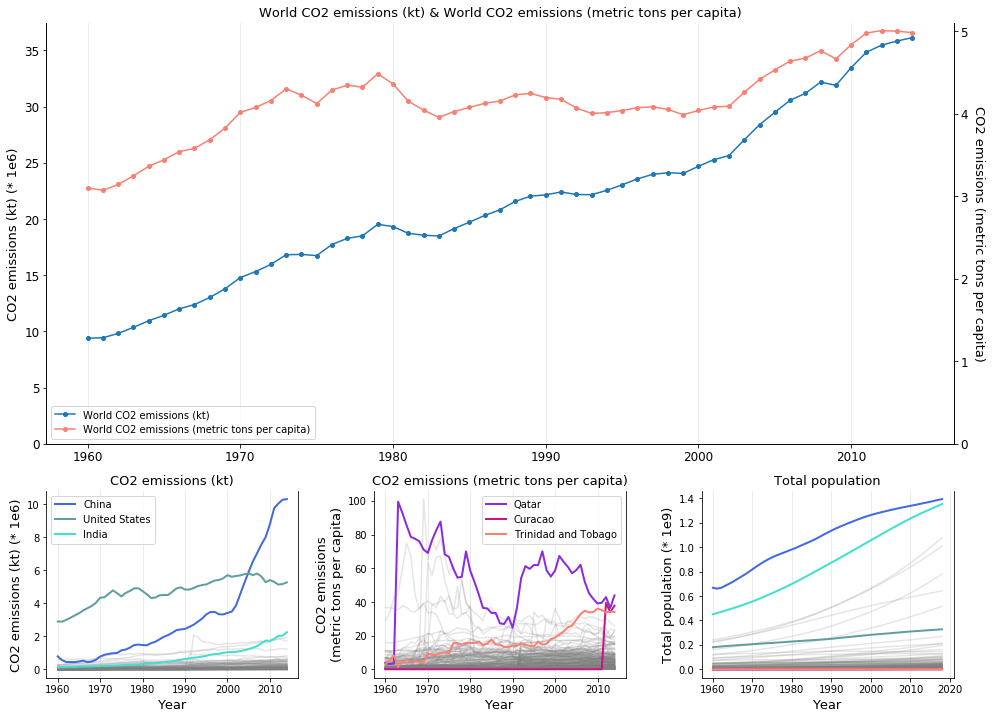

In [13]:
fig, axarr = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))

ax00 = plt.subplot2grid((3, 3), (0, 0), rowspan=2, colspan=3)
ax00.set_title('World CO2 emissions (kt) & World CO2 emissions (metric tons per capita)', fontdict={'fontsize': 13})

line_co2kt, = ax00.plot(co2_kt_pos.index,
                        co2_kt_pos['World'],
                        label='World CO2 emissions (kt)',
                        marker='.',
                        markersize=8)

ax00_02 = ax00.twinx()
line_co2tons, = ax00_02.plot(co2_tons_pos.index,
                             co2_tons_pos['World'],
                             color='salmon',
                             label='World CO2 emissions (metric tons per capita)',
                             marker='.',
                             markersize=8)

ax00.tick_params(axis='both', labelsize=12)
ax00.set_ylabel('CO2 emissions (kt) (* 1e6)', size=13)
ax00.set_ylim(bottom=0)
ax00.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
ax00.spines['top'].set_visible(False)
ax00.grid(alpha=0.3, axis='x')
ax00.legend(loc=3)
ax00.legend(handles=[line_co2kt, line_co2tons], loc=3)


ax00_02.tick_params(axis='both', labelsize=12)
ax00_02.set_ylabel('CO2 emissions (metric tons per capita)', rotation=270, labelpad=17, size=13)
ax00_02.set_ylim(bottom=0)
ax00_02.spines['top'].set_visible(False)


ax20 = axarr[2, 0]
ax20.set_title('CO2 emissions (kt)', fontdict={'fontsize': 13})

for col in co2_kt_pos.drop(columns=co2_emission_kt_exclu).columns:
    ax20.plot(co2_kt_pos.index,
              co2_kt_pos[col],
              label=col,
              color='gray',
              alpha=0.2)

line_cn, = ax20.plot(co2_kt_pos.index,
                     co2_kt_pos['China'],
                     color='royalblue',
                     linewidth=2)
line_us, = ax20.plot(co2_kt_pos.index,
                     co2_kt_pos['United States'],
                     color='cadetblue',
                     linewidth=2)
line_in, = ax20.plot(co2_kt_pos.index,
                     co2_kt_pos['India'],
                     color='turquoise',
                     linewidth=2)

ax20.set_xlabel('Year', size=13)
ax20.set_ylabel('CO2 emissions (kt) (* 1e6)', size=13)
ax20.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
ax20.legend(handles=[line_cn, line_us, line_in], loc=2)
ax20.spines['top'].set_visible(False)
ax20.grid(alpha=0.3, axis='x')


ax21 = axarr[2, 1]
ax21.set_title('CO2 emissions (metric tons per capita)', fontdict={'fontsize': 13})

for col in co2_tons_pos.drop(columns=co2_emission_tons_exclu).columns:
    ax21.plot(co2_tons_pos.index,
              co2_tons_pos[col],
              label=col,
              color='gray',
              alpha=0.2)

line_qa, = ax21.plot(co2_tons_pos.index,
                     co2_tons_pos['Qatar'],
                     color='blueviolet', # purple
                     linewidth=2)
line_cw, = ax21.plot(co2_tons_pos.index,
                     co2_tons_pos['Curacao'],
                     color='mediumvioletred',
                     linewidth=2)
line_tt, = ax21.plot(co2_tons_pos.index,
                     co2_tons_pos['Trinidad and Tobago'],
                     color='salmon',
                     linewidth=2)

ax21.set_xlabel('Year', size=13)
ax21.set_ylabel('CO2 emissions\n(metric tons per capita)', size=13)
ax21.legend(handles=[line_qa, line_cw, line_tt], loc=1)
ax21.spines['top'].set_visible(False)
ax21.grid(alpha=0.3, axis='x')


ax22 = axarr[2, 2]
ax22.set_title('Total population', fontdict={'fontsize': 13})

for col in pop_tot_1960_2018.drop(columns=pop_exclu).columns:
    ax22.plot(pop_tot_1960_2018.index,
              pop_tot_1960_2018[col],
              label=col,
              color='gray',
              alpha=0.2)

pop_cn, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['China'],
                     color='royalblue',
                     linewidth=2)
pop_us, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['United States'],
                     color='cadetblue',
                     linewidth=2)
pop_in, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['India'],
                     color='turquoise',
                     linewidth=2)
    
pop_qa, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Qatar'],
                     color='blueviolet', # purple
                     linewidth=2)
pop_cw, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Curacao'],
                     color='mediumvioletred',
                     linewidth=2)
pop_tt, = ax22.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Trinidad and Tobago'],
                     color='salmon',
                     linewidth=2)

ax22.set_xlabel('Year', size=13)
ax22.set_ylabel('Total population (* 1e9)', size=13)
ax22.yaxis.set_major_formatter(FORMATTER_BILLIONS_1DEC)
ax22.spines['top'].set_visible(False)
ax22.grid(alpha=0.3, axis='x')


plt.subplots_adjust(hspace=0.25, wspace=0.3, top=0.95,
                    bottom=0.04, left=0.05, right=0.95)
plt.show()
# plt.savefig('co2-emission_black.png', bbox_inches='tight')

In general, the world's CO2 emission increases 285% from 1960 to 2014, especially after 2000, it increases 46%. The top 3 countries in 2014 are China, United States and India. For United States and India, their emissions increased gently; on the contrary, China's CO2 emission exceeded United States and became the country whose CO2 emission is more than others. Between 2000 and 2014, China's CO2 emission increases 200%, which corresponds the world's emission curve.

Moreover, the world's CO2 emission per capita increases 61% from 1960 to 2014, especially after 2000, it increases 22%. Similarly, I find out the top 3 countries are Qatar, Curacao and Trinidad and Tobago. Considering the population per country, we observe that these 3 countries have pretty small population, so it's not difficult to understand why their CO2 emission per capita are more than other countries'.

(Yes, I only find data until 2014, it's really a pity, if you have found open source data for recent years, it's welcome!!)

### Map

In [14]:
import geopandas as gpd

assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)
gdf.rename(columns={'name':'Country'}, inplace=True)

In [15]:
gdf['Country'] = gdf['Country'].replace({'United States of America':'United States',
                                         'Bosnia and Herz.':'Bosnia and Herzegovina',
                                         'Central African Rep.':'Central African Republic',
                                         'Congo':'Congo, Rep.',
                                         'Dem. Rep. Congo':'Congo, Dem. Rep.',
                                         'Dominican Rep.':'Dominican Republic',
                                         'Egypt':'Egypt, Arab Rep.',
                                         'Iran':'Iran, Islamic Rep.',
                                         'Kyrgyzstan':'Kyrgyz Republic',
                                         'Russia':'Russian Federation',
                                         'Solomon Is.':'Solomon Islands',
                                         'Brunei':'Brunei Darussalam',
                                         'Czechia':'Czech Republic',
                                         'Eq. Guinea':'Equatorial Guinea',
                                         'S. Sudan':'South Sudan',
                                         'Slovakia':'Slovak Republic',
                                         'Syrian Arab Republic':'Syria',
                                         'Venezuela':'Venezuela, RB',
                                         'Yemen':'Yemen, Rep.',
                                         'eSwatini':'Eswatini'})

In [16]:
co2_kt_pos.rename(columns={'Bahamas, The':'Bahamas',
                           'Cote d\'Ivoire':'Côte d\'Ivoire',
                           'Gambia, The':'Gambia',
                           'Korea, Dem. People’s Rep.':'North Korea',
                           'Korea, Rep.':'South Korea',
                           'Lao PDR':'Laos',
                           'North Macedonia':'Macedonia'}, inplace=True)
co2_kt_hist = co2_kt_pos.drop(columns=not_ctry_list).stack().reset_index().rename(columns={'level_0':'Date',
                                                                                           'Country Name':'Country',
                                                                                           0:'CO2_kt'})

co2_kt_hist = pd.merge(co2_kt_hist, gdf[['Country']], on='Country')
co2_kt_hist.sort_values(['Country', 'Date'], inplace=True)
co2_kt_hist.reset_index(drop=True, inplace=True)
# take only history after 2001
co2_kt_hist = co2_kt_hist[co2_kt_hist.Date > '2001-01-01'].reset_index(drop=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
gdf_co2_hist = pd.merge(gdf, co2_kt_hist[['Country']], on='Country')
gdf_co2_hist.drop_duplicates(subset=['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est'], inplace=True)
gdf_co2_hist = gdf_co2_hist.sort_values('Country').reset_index(drop=True)
gdf_co2_hist = gdf_co2_hist[['Country', 'gdp_md_est', 'geometry']]

In [18]:
# co2_kt_hist.Country[co2_kt_hist.Country.isin(gdf.Country)==False].sort_values()

In [19]:
# gdf.Country[gdf.Country.isin(co2_kt_hist.Country)==False].sort_values()

In [20]:
datetime_index = pd.DatetimeIndex(co2_kt_hist['Date'].unique())

dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [21]:
styledata = {}

s = 0
e = 13 # 55
for i in gdf_co2_hist.index:
    df = pd.DataFrame(
        {'color': np.array(co2_kt_hist.CO2_kt[s:e]),
         'opacity': np.array([1] * 13)}, #55
        index=dt_index
    )
    styledata[i] = df
    s += 13 # 55
    e += 13 # 55


In [22]:
max_color = max(co2_kt_hist['CO2_kt'])
min_color = min(co2_kt_hist['CO2_kt'])
max_opacity, min_opacity = 1, 1

In [23]:
import branca.colormap as cm
cmap = cm.LinearColormap(
    ['green', 'yellow', 'red'],
    vmin=min_color, vmax=max_color
)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1


In [24]:
cmap

In [25]:
styledict = {
    str(ctry): data.to_dict(orient='index') for ctry, data in styledata.items()
}

In [26]:
import folium
from folium.plugins import TimeSliderChoropleth

co2_kt_hist_map = folium.Map(location=[0, 0], zoom_start = 1.5, tiles='cartodbpositron')# cartodbpositron, Stamen Toner

TimeSliderChoropleth(
    gdf_co2_hist.to_json(),
    styledict=styledict
).add_to(co2_kt_hist_map)

co2_kt_hist_map
# co2_kt_hist_map.save('co2_kt_hist_map.html')

Although we lack data of some countries or regions, we can still find that the CO2 emission doesn't change a lot for almost countries or regions and their CO2 emission is not that much in general; except for China, United States and India, which correspond to the line charts above.

## Greenhouse gas emission

1 metric ton = 0.98421 ton

In [27]:
greenhouse_gas_pos = greenhouse_gas_1960_2018[greenhouse_gas_1960_2018['World'] > 0] # kt of CO2 equivalent
methane_pos = methane_1960_2018[methane_1960_2018['World'] > 0] # kt of CO2 equivalent
n2o_pos = n2o_1960_2018[n2o_1960_2018['World'] > 0] # thousand metric tons of CO2 equivalent
n2o_pos['World_kt'] = n2o_pos['World'] * 0.98421

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
# colormap
cmap_ghg = matplotlib.cm.get_cmap('autumn_r')
cmap_methane = matplotlib.cm.get_cmap('summer_r')
cmap_n2o = matplotlib.cm.get_cmap('cool')

# greenhouse gas
normalize_ghg = matplotlib.colors.Normalize(vmin=min(greenhouse_gas_pos['World']),
                                            vmax=max(greenhouse_gas_pos['World']))
colors_ghg = [cmap_ghg(normalize_ghg(value)) for value in list(greenhouse_gas_pos['World'].values)]

# methane
normalize_methane = matplotlib.colors.Normalize(vmin=min(methane_pos['World']),
                                                vmax=max(methane_pos['World']))
colors_methane = [cmap_methane(normalize_methane(value)) for value in list(methane_pos['World'].values)]

# N2O
normalize_n2o = matplotlib.colors.Normalize(vmin=min(n2o_pos['World']),
                                            vmax=max(n2o_pos['World']))
colors_n2o = [cmap_n2o(normalize_n2o(value)) for value in list(n2o_pos['World'].values)]

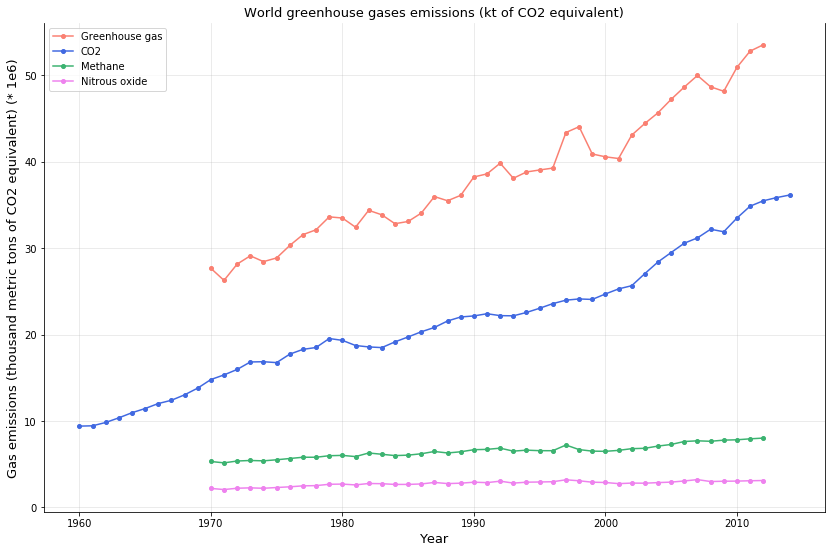

In [29]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))

axarr.set_title('World greenhouse gases emissions (kt of CO2 equivalent)', fontdict={'fontsize': 13})

line_ghg, = axarr.plot(greenhouse_gas_pos.index,
                       greenhouse_gas_pos['World'],
                       label='Greenhouse gas',
                       color='salmon',
                       marker='.',
                       markersize=8)

line_co2, = axarr.plot(co2_kt_pos.index,
                       co2_kt_pos['World'],
                       label='CO2',
                       color='royalblue',
                       marker='.',
                       markersize=8)

line_methane, = axarr.plot(methane_pos.index,
                           methane_pos['World'],
                           label='Methane',
                           color='mediumseagreen',
                           marker='.',
                           markersize=8)

line_no2, = axarr.plot(n2o_pos.index,
                       n2o_pos['World_kt'],
                       label='Nitrous oxide',
                       color='violet',
                       marker='.',
                       markersize=8)

axarr.set_xlabel('Year', size=13)
axarr.set_ylabel('Gas emissions (thousand metric tons of CO2 equivalent) (* 1e6)', size=13)
axarr.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
axarr.legend(handles=[line_ghg, line_co2, line_methane, line_no2], loc=2)
axarr.spines['top'].set_visible(False)
axarr.grid(alpha=0.3)

plt.show()
# plt.savefig('ghg-emission_black.png', bbox_inches='tight')

Greenhouse gases are those that absorb and emit infrared radiation in the wavelength range emitted by Earth. In order, the most abundant greenhouse gases in Earth's atmosphere are: Water vapor (H2O), Carbon dioxide (CO2), Methane (CH4), Nitrous oxide (N2O), Ozone (O3), Chlorofluorocarbons (CFCs) and Hydrofluorocarbons (includes HCFCs and HFCs). Here, I have only emission data of greenhouse gas, CO2, Methane and Nitrous oxide.

We have talked about the tendance of CO2, now let's look at the greenhouse gas emission. Greenhouse gas's emission increased nearly 94% between 1970 and 2012, especially after 2001, it increased 33%. However, the emission of Methane and Nitrous oxide didn't increase that much. Since CO2's emission is usually generated by burning fossil fuels, deforestation or biological respiration, and the emission of ethane and Nitrous oxide is caused by intestinal fermentation, combustion of organisms or fertilizer production, which are less frequency.

## Electric power consumption (kWh per capita) & Energy use (kg of oil equivalent per capita)

In [30]:
elec_power_pos = elec_power_1960_2018[elec_power_1960_2018['World'] > 0]
elec_power_top3 = ['Iceland', 'Norway', 'Bahrain']
elec_power_exclu = not_ctry_list + elec_power_top3

In [31]:
energy_use_pos = energy_use_1960_2018[energy_use_1960_2018['World'] > 0]
energy_use_top3 = ['Qatar', 'Iceland', 'Trinidad and Tobago']
energy_use_exclu = not_ctry_list + energy_use_top3

In [32]:
cmap_elec = matplotlib.cm.get_cmap('winter_r')
normalize_elec = matplotlib.colors.Normalize(vmin=min(elec_power_pos['World']),
                                             vmax=max(elec_power_pos['World']))
colors_elec = [cmap_elec(normalize_elec(value)) for value in list(elec_power_pos['World'].values)]

cmap_energy = matplotlib.cm.get_cmap('autumn_r')
normalize_energy = matplotlib.colors.Normalize(vmin=min(energy_use_pos['World']),
                                               vmax=max(energy_use_pos['World']))
colors_energy = [cmap_energy(normalize_energy(value)) for value in list(energy_use_pos['World'].values)]

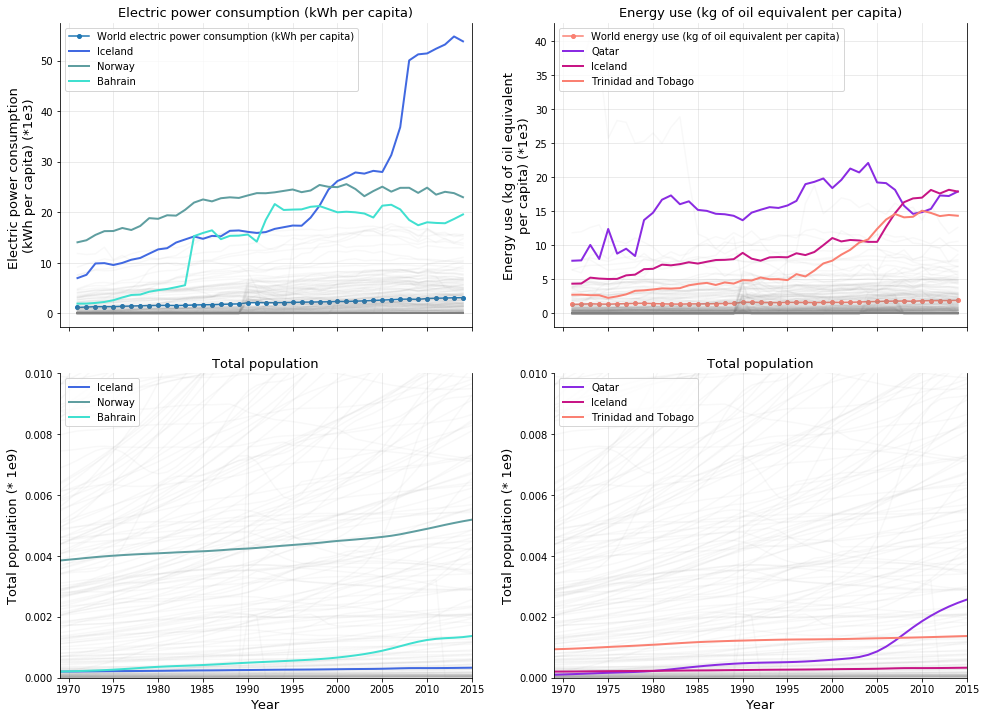

In [33]:
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True)

ax00 = axarr[0, 0]
ax00.set_title('Electric power consumption (kWh per capita)', fontdict={'fontsize': 13})

line_elec, = ax00.plot(elec_power_pos.index,
                       elec_power_pos['World'],
                       label='World electric power consumption (kWh per capita)',
                       marker='.',
                       markersize=8)

for col in elec_power_pos.drop(columns=elec_power_exclu).columns:
    ax00.plot(elec_power_pos.index,
              elec_power_pos[col],
              label=col,
              color='gray',
              alpha=0.05)


elec_is, = ax00.plot(elec_power_pos.index,
                      elec_power_pos['Iceland'],
                      color='royalblue',
                      linewidth=2)
elec_no, = ax00.plot(elec_power_pos.index,
                      elec_power_pos['Norway'],
                      color='cadetblue',
                      linewidth=2)
elec_bh, = ax00.plot(elec_power_pos.index,
                      elec_power_pos['Bahrain'],
                      color='turquoise',
                      linewidth=2)

ax00.set_ylabel('Electric power consumption \n(kWh per capita) (*1e3)', size=13)
ax00.yaxis.set_major_formatter(FORMATTER_MILLES)
ax00.legend(handles=[line_elec, elec_is, elec_no, elec_bh], loc=2)
ax00.spines['top'].set_visible(False)
ax00.grid(alpha=0.3)

ax10 = axarr[1, 0]
ax10.set_title('Total population', fontdict={'fontsize': 13})

for col in pop_tot_1960_2018.drop(columns=elec_power_exclu).columns:
    ax10.plot(pop_tot_1960_2018.index,
              pop_tot_1960_2018[col],
              label=col,
              color='gray',
              alpha=0.05)

pop_is, = ax10.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Iceland'],
                     color='royalblue',
                     linewidth=2)
pop_no, = ax10.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Norway'],
                     color='cadetblue',
                     linewidth=2)
pop_bh, = ax10.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Bahrain'],
                     color='turquoise',
                     linewidth=2)

ax10.set_xlabel('Year', size=13)
ax10.set_ylabel('Total population (* 1e9)', size=13)
ax10.set_xlim(left = '1969', right = '2015')
ax10.set_ylim(bottom = -50, top = 10000000)
ax10.yaxis.set_major_formatter(FORMATTER_BILLIONS_3DEC)
ax10.legend(handles=[pop_is, pop_no, pop_bh], loc=2)
ax10.spines['top'].set_visible(False)
ax10.grid(alpha=0.3, axis='x')


ax01 = axarr[0, 1]
ax01.set_title('Energy use (kg of oil equivalent per capita)', fontdict={'fontsize': 13})

line_energy, = ax01.plot(energy_use_pos.index,
                         energy_use_pos['World'],
                         label='World energy use (kg of oil equivalent per capita)',
                         color='salmon',
                         marker='.',
                         markersize=8)

for col in energy_use_pos.drop(columns=energy_use_exclu).columns:
    ax01.plot(energy_use_pos.index,
              energy_use_pos[col],
              label=col,
              color='gray',
              alpha=0.05)

energy_qa, = ax01.plot(energy_use_pos.index,
                       energy_use_pos['Qatar'],
                       color='blueviolet', # purple
                       linewidth=2)
energy_is, = ax01.plot(energy_use_pos.index,
                       energy_use_pos['Iceland'],
                       color='mediumvioletred',
                       linewidth=2)
energy_tt, = ax01.plot(energy_use_pos.index,
                       energy_use_pos['Trinidad and Tobago'],
                       color='salmon',
                       linewidth=2)

ax01.set_ylabel('Energy use (kg of oil equivalent\nper capita) (*1e3)', size=13)
ax01.yaxis.set_major_formatter(FORMATTER_MILLES)
ax01.legend(handles=[line_energy, energy_qa, energy_is, energy_tt], loc=2)
ax01.spines['top'].set_visible(False)
ax01.grid(alpha=0.3)

ax11 = axarr[1, 1]
ax11.set_title('Total population', fontdict={'fontsize': 13})

for col in pop_tot_1960_2018.drop(columns=energy_use_exclu).columns:
    ax11.plot(pop_tot_1960_2018.index,
              pop_tot_1960_2018[col],
              label=col,
              color='gray',
              alpha=0.05)

pop_qa, = ax11.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Qatar'],
                     color='blueviolet', # purple
                     linewidth=2)
pop_is, = ax11.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Iceland'],
                     color='mediumvioletred',
                     linewidth=2)
pop_tt, = ax11.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Trinidad and Tobago'],
                     color='salmon',
                     linewidth=2)

ax11.set_xlabel('Year', size=13)
ax11.set_ylabel('Total population (* 1e9)', size=13)
ax11.set_ylim(bottom = -50, top = 10000000)
ax11.yaxis.set_major_formatter(FORMATTER_BILLIONS_3DEC)
ax11.legend(handles=[pop_qa, pop_is, pop_tt], loc=2)
ax11.spines['top'].set_visible(False)
ax11.grid(alpha=0.3, axis='x')


plt.subplots_adjust(hspace=0.15, wspace=0.2, top=0.95,
                    bottom=0.04, left=0.05, right=0.95)
plt.show()
# plt.savefig('electric-energy_black.png', bbox_inches='tight')

The world's electric power consumption(kWh per capita) and world's energy use(kg of oil equivalent per capita) increase 161%(1200.1 kWh to 3132.1 kWh) and 44%(1337 kg to 1922.5 kg) respectively between 1971 and 2014. For the electric power consumption(kWh per capita), the top 3 countries are Iceland, Norway and Bahrain; for the energy use(kg of oil equivalent per capita), the top 3 countries are Qatar, Iceland and Trinidad and Tobago. Considering it's the value per capita, so one reason why they are the "top 3" is their population is lower than others, which increases consumption per capita.

## Forest area (sq. km) & Forest area (% of land area)

In [34]:
forest_areaSQ_pos = forest_areaSQ_1960_2018[forest_areaSQ_1960_2018['World'] > 0]
forest_areaPct_pos = forest_areaPct_1960_2018[forest_areaPct_1960_2018['World'] > 0]

In [35]:
forest_areaSQ_pos.rename(columns={'Bahamas, The':'Bahamas',
                                  'Cote d\'Ivoire':'Côte d\'Ivoire',
                                  'Gambia, The':'Gambia',
                                  'Korea, Dem. People’s Rep.':'North Korea',
                                  'Korea, Rep.':'South Korea',
                                  'Lao PDR':'Laos',
                                  'North Macedonia':'Macedonia'}, inplace=True)
forest_areaSQ_hist = forest_areaSQ_pos.drop(columns=not_ctry_list).stack().reset_index().rename(columns={'level_0':'Date',
                                                                                                         'Country Name':'Country',
                                                                                                         0:'Forest_SQ'})
forest_areaSQ_hist = pd.merge(forest_areaSQ_hist, gdf[['Country']], on='Country')
forest_areaSQ_hist.sort_values(['Country', 'Date'], inplace=True)
forest_areaSQ_hist.reset_index(drop=True, inplace=True)
# take only history after 2001
forest_areaSQ_hist = forest_areaSQ_hist[forest_areaSQ_hist.Date > '2001-01-01'].reset_index(drop=True)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [36]:
gdf_forest_areaSQ_hist = pd.merge(gdf, forest_areaSQ_hist[['Country']], on='Country')
gdf_forest_areaSQ_hist.drop_duplicates(subset=['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est'],
                                       inplace=True)
gdf_forest_areaSQ_hist = gdf_forest_areaSQ_hist.sort_values('Country').reset_index(drop=True)
gdf_forest_areaSQ_hist = gdf_forest_areaSQ_hist[['Country', 'gdp_md_est', 'geometry']]

In [37]:
datetime_index = pd.DatetimeIndex(forest_areaSQ_hist['Date'].unique())

dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [38]:
styledata = {}

s = 0
e = 15
for i in gdf_forest_areaSQ_hist.index:
    df = pd.DataFrame(
        {'color': np.array(forest_areaSQ_hist.Forest_SQ[s:e]),
         'opacity': np.array([1] * 15)},
        index=dt_index
    )
    styledata[i] = df
    s += 15
    e += 15

In [39]:
max_color = max(forest_areaSQ_hist['Forest_SQ'])
min_color = min(forest_areaSQ_hist['Forest_SQ'])
max_opacity, min_opacity = 1, 1

In [40]:
from branca.colormap import linear

cmap = linear.BuGn_07.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

In [41]:
cmap

In [42]:
styledict = {
    str(ctry): data.to_dict(orient='index') for ctry, data in styledata.items()
}

In [43]:
forest_areaSQ_hist_map = folium.Map(location=[0, 0], zoom_start = 1.5, tiles='cartodbpositron')

TimeSliderChoropleth(
    gdf_forest_areaSQ_hist.to_json(),
    styledict=styledict
).add_to(forest_areaSQ_hist_map)

forest_areaSQ_hist_map
# forest_areaSQ_hist_map.save('forest_areaSQ_hist_map.html')

Obviously, Russia's forest is largest than other countries in the world. The top 5 countries in terms of forest area are Russia, Brezil, Canada, United States and China; especially for China, its forest area increases 14.4% (264456 square km) from 2002 to 2016. Besides, the Amazon rainforest has been on fire for the past month, we don't know how large it burnt yet, but it's really a great loss for all human beings.